In [1]:
!pip install -U -q segmentation-models --user

from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!pip freeze

absl-py==0.15.0
accelerate==0.5.1
access==1.1.3
affine==2.3.0
aiobotocore==2.1.1
aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1637087016127/work
aioitertools==0.10.0
aiosignal @ file:///home/conda/feedstock_root/build_artifacts/aiosignal_1636093929600/work
albumentations==1.1.0
alembic==1.7.6
allennlp==2.9.0
altair==4.2.0
annoy==1.17.0
ansiwrap==0.8.4
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1637703203932/work/dist
apache-beam==2.34.0
aplus==0.11.0
appdirs @ file:///home/conda/feedstock_root/build_artifacts/appdirs_1603108395799/work
argcomplete @ file:///home/conda/feedstock_root/build_artifacts/argcomplete_1619128689661/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1636021379047/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1635261338479/work
arviz==0.11.4
asgiref==3.5.0
asn1crypto @ file:///home/conda/feedstock_root/build_artifacts/asn1crypto_1595949944546/work
astropy==4.3.1
astu

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["SM_FRAMEWORK"] = "tf.keras"

import segmentation_models as sm
import matplotlib.pyplot as plt 
import tensorflow_io as tfio
import tensorflow as tf



exts = ('jpg', 'JPG', 'png', 'PNG', 'tif', 'gif', 'ppm')

Segmentation Models: using `tf.keras` framework.


In [4]:
print(tf. __version__) 
print(tfio. __version__)

2.6.2
0.21.0


# DRIVE

The dataset comes with pair of input retina image and target mask. Among all retina image, we will only use this dataset for a quick baseline. However, rest of the dataset can be replaces easily on this pipeline.


In [54]:
input_data = '/kaggle/input/dataset/new_data/new_data/train/image'
images = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

images

['/kaggle/input/dataset/new_data/new_data/train/image/21_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/23_training_0.tif',
 '/kaggle/input/dataset/new_data/new_d

In [56]:
target_data = '/kaggle/input/dataset/new_data/new_data/train/mask'
masks = sorted(
    [
        os.path.join(target_data, fname)
        for fname in os.listdir(target_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
masks

['/kaggle/input/dataset/new_data/new_data/train/mask/21_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/23_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mas

In [57]:
print("Number of samples:", len(images), len(masks))
for input_path, target_path in zip(images[:10], masks[:10]):
    print(input_path[-31:], "|", target_path[-34:])

Number of samples: 120 120
a/train/image/21_training_0.tif | _data/train/mask/21_training_0.gif
a/train/image/21_training_1.tif | _data/train/mask/21_training_1.gif
a/train/image/21_training_2.tif | _data/train/mask/21_training_2.gif
a/train/image/21_training_3.tif | _data/train/mask/21_training_3.gif
a/train/image/21_training_4.tif | _data/train/mask/21_training_4.gif
a/train/image/21_training_5.tif | _data/train/mask/21_training_5.gif
a/train/image/22_training_0.tif | _data/train/mask/22_training_0.gif
a/train/image/22_training_1.tif | _data/train/mask/22_training_1.gif
a/train/image/22_training_2.tif | _data/train/mask/22_training_2.gif
a/train/image/22_training_3.tif | _data/train/mask/22_training_3.gif


In [58]:
from sklearn.model_selection import train_test_split
IMAGE_SIZE = 512
BATCH_SIZE = 12

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset
################################################3
train_x, valid_x, train_y, valid_y = train_test_split(images, masks, test_size=0.1, random_state=42)
train_dataset = data_generator(train_x, train_y)
train_dataset
validation_dataset = data_generator(valid_x, valid_y)
validation_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [59]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images) 
    plt.figure(figsize=(20, 20))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap='gray')
    plt.show()

(12, 512, 512, 3) (12, 512, 512, 1)
0 1
[0 1]


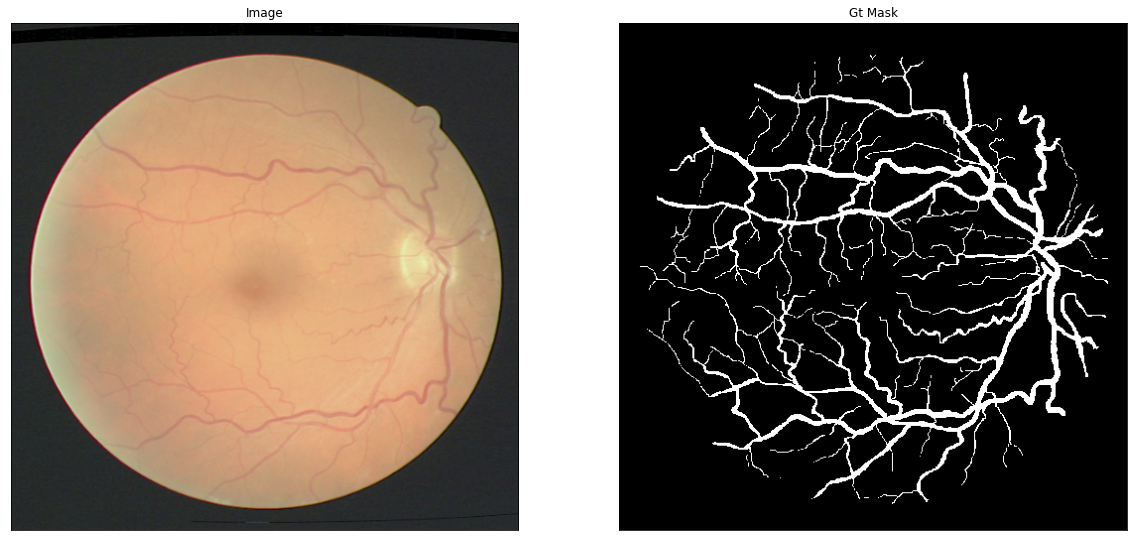

0 1
[0 1]


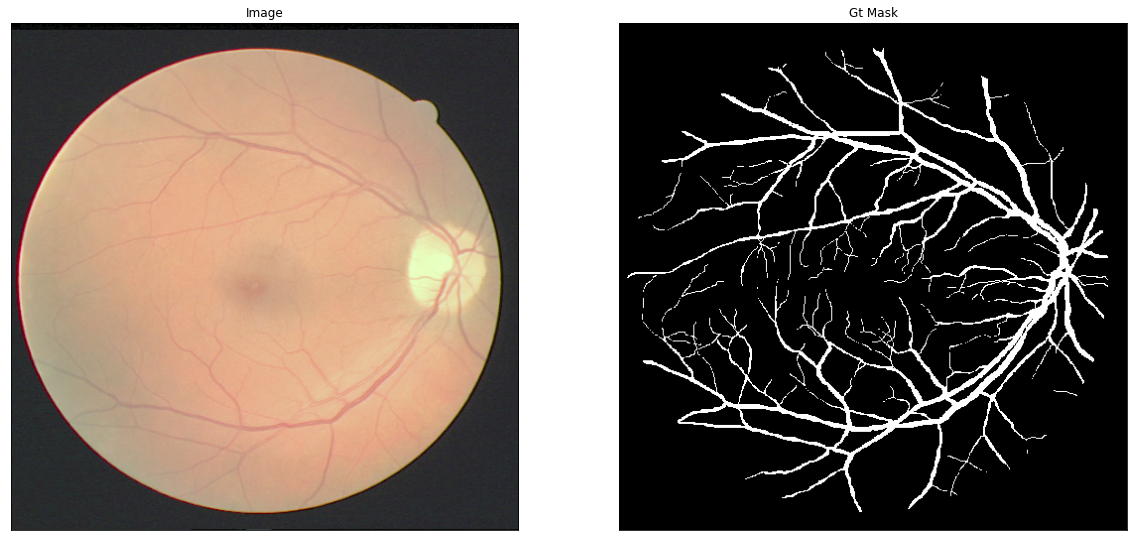

In [60]:
image, mask = next(iter(train_dataset.take(1))) 
print(image.shape, mask.shape)

for (img, msk) in zip(image[:2], mask[:2]):
    print(mask.numpy().min(), mask.numpy().max())
    print(np.unique(mask.numpy()))
    visualize(
        image=img.numpy(),
        gt_mask=msk.numpy(),
    )

# Model

In [61]:
from tensorflow import keras 

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()
#improvement 1
BACKBONE   = 'vgg19'
n_classes  = 1 
activation = 'sigmoid' 
model2 = sm.Unet(BACKBONE, classes=n_classes, activation=activation)
model2.summary(line_length=110)

Model: "model"
______________________________________________________________________________________________________________
Layer (type)                        Output Shape            Param #      Connected to                         
input_1 (InputLayer)                [(None, None, None, 3)] 0                                                 
______________________________________________________________________________________________________________
block1_conv1 (Conv2D)               (None, None, None, 64)  1792         input_1[0][0]                        
______________________________________________________________________________________________________________
block1_conv2 (Conv2D)               (None, None, None, 64)  36928        block1_conv1[0][0]                   
______________________________________________________________________________________________________________
block1_pool (MaxPooling2D)          (None, None, None, 64)  0            block1_conv2[0][0]      

# Callback : Monitoring Training Progress

In [62]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, dataset, epoch_interval=5):
        self.dataset = dataset
        self.epoch_interval = epoch_interval
    
    def display(self, display_list, extra_title=''):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']

        if len(display_list) > len(title):
            title.append(extra_title)

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i], cmap='gray')
            plt.axis('off')
        plt.show()
        
    def create_mask(self, pred_mask):
        pred_mask = (pred_mask > 0.5).astype("int32")
        return pred_mask[0]
    
    def show_predictions(self, dataset, num=1):
        for image, mask in dataset.take(num):
            pred_mask = model2.predict(image)
            self.display([image[0], mask[0], self.create_mask(pred_mask)])
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch and epoch % self.epoch_interval == 0:
            self.show_predictions(self.dataset)
            print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [63]:
import os

# Define the directory to save the model
save_directory = '/kaggle/Models/'  # Change this to your desired directory

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)




In [64]:
# Define a callback to save the best model weights
checkpoint_callback = ModelCheckpoint(
    os.path.join(save_directory, "model2.h5"), monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# Define a callback for early stopping
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

# Define your DisplayCallback with the dataset and interval
display_callback = DisplayCallback(dataset=validation_dataset, epoch_interval=5)

# Compile and Fit

Epoch 1/250
9/9 [==============================] - 9s 792ms/step - loss: 0.7697 - accuracy: 0.4933 - val_loss: 1.4464 - val_accuracy: 0.1618

Epoch 00001: val_loss improved from inf to 1.44644, saving model to /kaggle/Models/model2.h5
Epoch 2/250
9/9 [==============================] - 7s 747ms/step - loss: 0.6413 - accuracy: 0.7545 - val_loss: 1.1242 - val_accuracy: 0.2233

Epoch 00002: val_loss improved from 1.44644 to 1.12415, saving model to /kaggle/Models/model2.h5
Epoch 3/250
9/9 [==============================] - 7s 749ms/step - loss: 0.5673 - accuracy: 0.8237 - val_loss: 0.9335 - val_accuracy: 0.3171

Epoch 00003: val_loss improved from 1.12415 to 0.93354, saving model to /kaggle/Models/model2.h5
Epoch 4/250
9/9 [==============================] - 7s 748ms/step - loss: 0.5096 - accuracy: 0.8565 - val_loss: 1.2812 - val_accuracy: 0.2517

Epoch 00004: val_loss did not improve from 0.93354
Epoch 5/250
9/9 [==============================] - 7s 746ms/step - loss: 0.4624 - accuracy: 0.

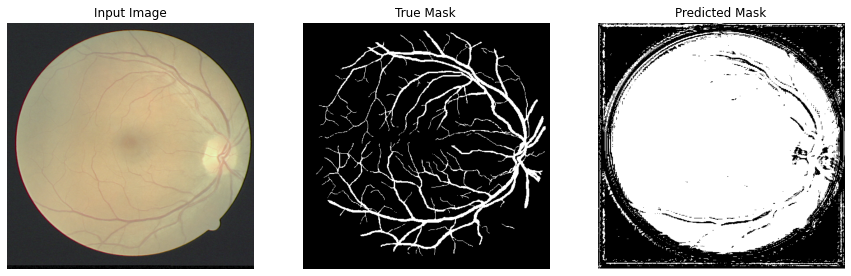


Sample Prediction after epoch 6

Epoch 7/250
9/9 [==============================] - 7s 749ms/step - loss: 0.3947 - accuracy: 0.9227 - val_loss: 1.2424 - val_accuracy: 0.4400

Epoch 00007: val_loss did not improve from 0.93354
Epoch 8/250
9/9 [==============================] - 7s 746ms/step - loss: 0.3673 - accuracy: 0.9319 - val_loss: 1.1894 - val_accuracy: 0.4434

Epoch 00008: val_loss did not improve from 0.93354
Epoch 9/250
9/9 [==============================] - 7s 749ms/step - loss: 0.3408 - accuracy: 0.9380 - val_loss: 1.1831 - val_accuracy: 0.4446

Epoch 00009: val_loss did not improve from 0.93354
Epoch 10/250
9/9 [==============================] - 7s 749ms/step - loss: 0.3230 - accuracy: 0.9445 - val_loss: 1.3130 - val_accuracy: 0.4495

Epoch 00010: val_loss did not improve from 0.93354
Epoch 11/250
9/9 [==============================] - 7s 750ms/step - loss: 0.3081 - accuracy: 0.9480 - val_loss: 1.2137 - val_accuracy: 0.4544

Epoch 00011: val_loss did not improve from 0.93354

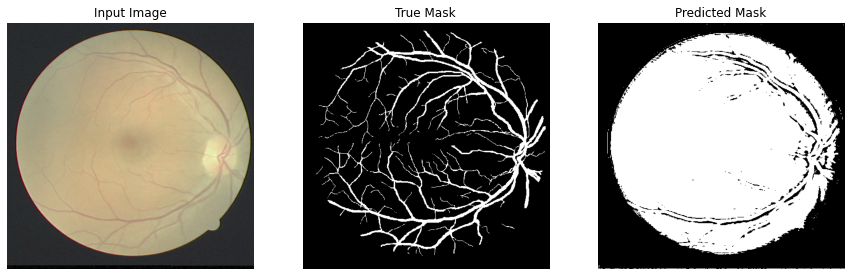


Sample Prediction after epoch 11

Epoch 12/250
9/9 [==============================] - 7s 746ms/step - loss: 0.2960 - accuracy: 0.9504 - val_loss: 1.0345 - val_accuracy: 0.4659

Epoch 00012: val_loss did not improve from 0.93354
Epoch 13/250
9/9 [==============================] - 7s 753ms/step - loss: 0.2861 - accuracy: 0.9519 - val_loss: 0.9043 - val_accuracy: 0.4835

Epoch 00013: val_loss improved from 0.93354 to 0.90426, saving model to /kaggle/Models/model2.h5
Epoch 14/250
9/9 [==============================] - 7s 745ms/step - loss: 0.2774 - accuracy: 0.9530 - val_loss: 0.6711 - val_accuracy: 0.5682

Epoch 00014: val_loss improved from 0.90426 to 0.67108, saving model to /kaggle/Models/model2.h5
Epoch 15/250
9/9 [==============================] - 7s 749ms/step - loss: 0.2695 - accuracy: 0.9538 - val_loss: 0.6194 - val_accuracy: 0.6171

Epoch 00015: val_loss improved from 0.67108 to 0.61936, saving model to /kaggle/Models/model2.h5
Epoch 16/250
9/9 [==============================] -

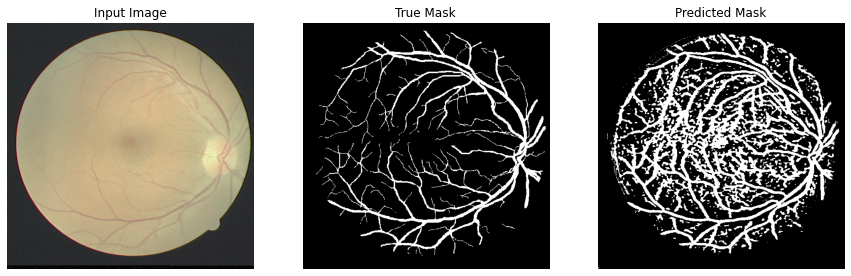


Sample Prediction after epoch 16

Epoch 17/250
9/9 [==============================] - 7s 749ms/step - loss: 0.2556 - accuracy: 0.9555 - val_loss: 0.4260 - val_accuracy: 0.8800

Epoch 00017: val_loss improved from 0.50379 to 0.42595, saving model to /kaggle/Models/model2.h5
Epoch 18/250
9/9 [==============================] - 7s 749ms/step - loss: 0.2493 - accuracy: 0.9560 - val_loss: 0.3742 - val_accuracy: 0.9213

Epoch 00018: val_loss improved from 0.42595 to 0.37425, saving model to /kaggle/Models/model2.h5
Epoch 19/250
9/9 [==============================] - 7s 749ms/step - loss: 0.2431 - accuracy: 0.9568 - val_loss: 0.3169 - val_accuracy: 0.9427

Epoch 00019: val_loss improved from 0.37425 to 0.31686, saving model to /kaggle/Models/model2.h5
Epoch 20/250
9/9 [==============================] - 7s 746ms/step - loss: 0.2373 - accuracy: 0.9574 - val_loss: 0.3059 - val_accuracy: 0.9460

Epoch 00020: val_loss improved from 0.31686 to 0.30585, saving model to /kaggle/Models/model2.h5
Epoch

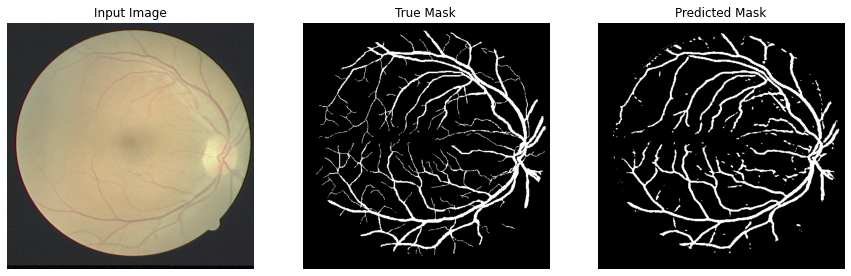


Sample Prediction after epoch 21

Epoch 22/250
9/9 [==============================] - 7s 749ms/step - loss: 0.2269 - accuracy: 0.9584 - val_loss: 0.2688 - val_accuracy: 0.9510

Epoch 00022: val_loss improved from 0.28049 to 0.26876, saving model to /kaggle/Models/model2.h5
Epoch 23/250
9/9 [==============================] - 7s 749ms/step - loss: 0.2220 - accuracy: 0.9587 - val_loss: 0.2464 - val_accuracy: 0.9580

Epoch 00023: val_loss improved from 0.26876 to 0.24642, saving model to /kaggle/Models/model2.h5
Epoch 24/250
9/9 [==============================] - 7s 750ms/step - loss: 0.2172 - accuracy: 0.9593 - val_loss: 0.2368 - val_accuracy: 0.9577

Epoch 00024: val_loss improved from 0.24642 to 0.23681, saving model to /kaggle/Models/model2.h5
Epoch 25/250
9/9 [==============================] - 7s 746ms/step - loss: 0.2124 - accuracy: 0.9597 - val_loss: 0.2278 - val_accuracy: 0.9576

Epoch 00025: val_loss improved from 0.23681 to 0.22780, saving model to /kaggle/Models/model2.h5
Epoch

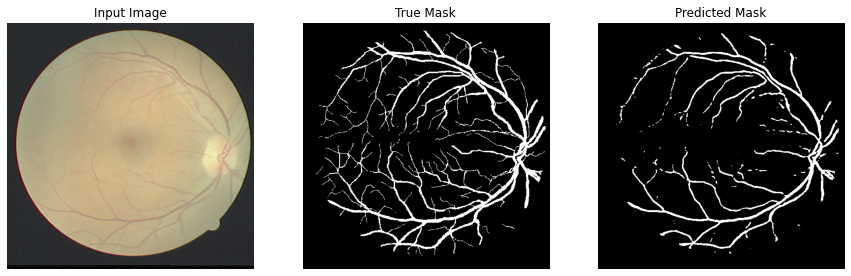


Sample Prediction after epoch 26

Epoch 27/250
9/9 [==============================] - 7s 750ms/step - loss: 0.2032 - accuracy: 0.9608 - val_loss: 0.2193 - val_accuracy: 0.9551

Epoch 00027: val_loss improved from 0.22246 to 0.21931, saving model to /kaggle/Models/model2.h5
Epoch 28/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1992 - accuracy: 0.9611 - val_loss: 0.2170 - val_accuracy: 0.9543

Epoch 00028: val_loss improved from 0.21931 to 0.21703, saving model to /kaggle/Models/model2.h5
Epoch 29/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1955 - accuracy: 0.9612 - val_loss: 0.2065 - val_accuracy: 0.9547

Epoch 00029: val_loss improved from 0.21703 to 0.20649, saving model to /kaggle/Models/model2.h5
Epoch 30/250
9/9 [==============================] - 7s 755ms/step - loss: 0.1913 - accuracy: 0.9619 - val_loss: 0.2014 - val_accuracy: 0.9549

Epoch 00030: val_loss improved from 0.20649 to 0.20136, saving model to /kaggle/Models/model2.h5
Epoch

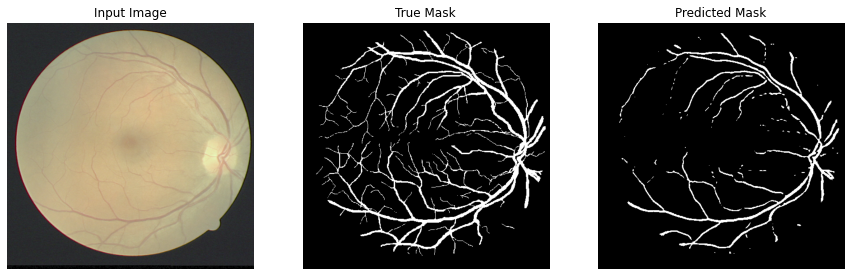


Sample Prediction after epoch 31

Epoch 32/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1835 - accuracy: 0.9628 - val_loss: 0.1978 - val_accuracy: 0.9521

Epoch 00032: val_loss improved from 0.20136 to 0.19782, saving model to /kaggle/Models/model2.h5
Epoch 33/250
9/9 [==============================] - 7s 747ms/step - loss: 0.1800 - accuracy: 0.9631 - val_loss: 0.1972 - val_accuracy: 0.9505

Epoch 00033: val_loss improved from 0.19782 to 0.19715, saving model to /kaggle/Models/model2.h5
Epoch 34/250
9/9 [==============================] - 7s 750ms/step - loss: 0.1766 - accuracy: 0.9634 - val_loss: 0.1967 - val_accuracy: 0.9486

Epoch 00034: val_loss improved from 0.19715 to 0.19667, saving model to /kaggle/Models/model2.h5
Epoch 35/250
9/9 [==============================] - 7s 747ms/step - loss: 0.1733 - accuracy: 0.9637 - val_loss: 0.1913 - val_accuracy: 0.9506

Epoch 00035: val_loss improved from 0.19667 to 0.19126, saving model to /kaggle/Models/model2.h5
Epoch

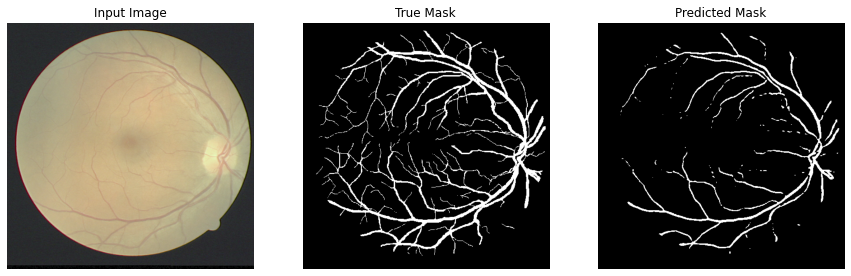


Sample Prediction after epoch 36

Epoch 37/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1673 - accuracy: 0.9643 - val_loss: 0.1890 - val_accuracy: 0.9485

Epoch 00037: val_loss did not improve from 0.18836
Epoch 38/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1645 - accuracy: 0.9645 - val_loss: 0.1846 - val_accuracy: 0.9490

Epoch 00038: val_loss improved from 0.18836 to 0.18459, saving model to /kaggle/Models/model2.h5
Epoch 39/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1615 - accuracy: 0.9648 - val_loss: 0.1831 - val_accuracy: 0.9494

Epoch 00039: val_loss improved from 0.18459 to 0.18310, saving model to /kaggle/Models/model2.h5
Epoch 40/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1590 - accuracy: 0.9651 - val_loss: 0.1806 - val_accuracy: 0.9496

Epoch 00040: val_loss improved from 0.18310 to 0.18058, saving model to /kaggle/Models/model2.h5
Epoch 41/250
9/9 [==============================] -

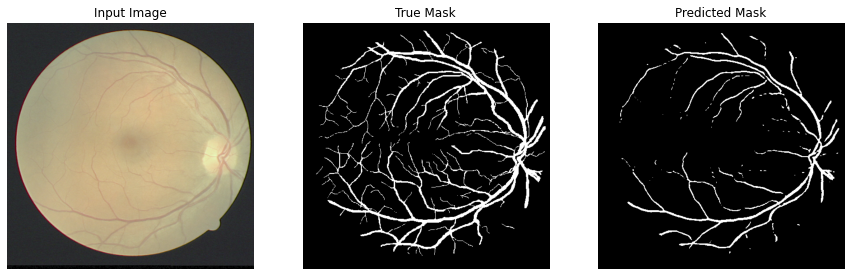


Sample Prediction after epoch 41

Epoch 42/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1537 - accuracy: 0.9657 - val_loss: 0.1784 - val_accuracy: 0.9487

Epoch 00042: val_loss did not improve from 0.17753
Epoch 43/250
9/9 [==============================] - 7s 747ms/step - loss: 0.1515 - accuracy: 0.9658 - val_loss: 0.1732 - val_accuracy: 0.9514

Epoch 00043: val_loss improved from 0.17753 to 0.17323, saving model to /kaggle/Models/model2.h5
Epoch 44/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1490 - accuracy: 0.9661 - val_loss: 0.1723 - val_accuracy: 0.9499

Epoch 00044: val_loss improved from 0.17323 to 0.17229, saving model to /kaggle/Models/model2.h5
Epoch 45/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1467 - accuracy: 0.9665 - val_loss: 0.1684 - val_accuracy: 0.9510

Epoch 00045: val_loss improved from 0.17229 to 0.16843, saving model to /kaggle/Models/model2.h5
Epoch 46/250
9/9 [==============================] -

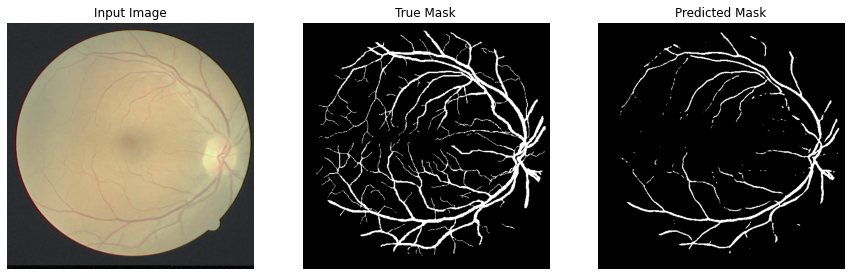


Sample Prediction after epoch 46

Epoch 47/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1423 - accuracy: 0.9670 - val_loss: 0.1608 - val_accuracy: 0.9542

Epoch 00047: val_loss improved from 0.16485 to 0.16080, saving model to /kaggle/Models/model2.h5
Epoch 48/250
9/9 [==============================] - 7s 747ms/step - loss: 0.1408 - accuracy: 0.9670 - val_loss: 0.1575 - val_accuracy: 0.9549

Epoch 00048: val_loss improved from 0.16080 to 0.15746, saving model to /kaggle/Models/model2.h5
Epoch 49/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1390 - accuracy: 0.9671 - val_loss: 0.1588 - val_accuracy: 0.9536

Epoch 00049: val_loss did not improve from 0.15746
Epoch 50/250
9/9 [==============================] - 7s 747ms/step - loss: 0.1374 - accuracy: 0.9671 - val_loss: 0.1518 - val_accuracy: 0.9565

Epoch 00050: val_loss improved from 0.15746 to 0.15178, saving model to /kaggle/Models/model2.h5
Epoch 51/250
9/9 [==============================] -

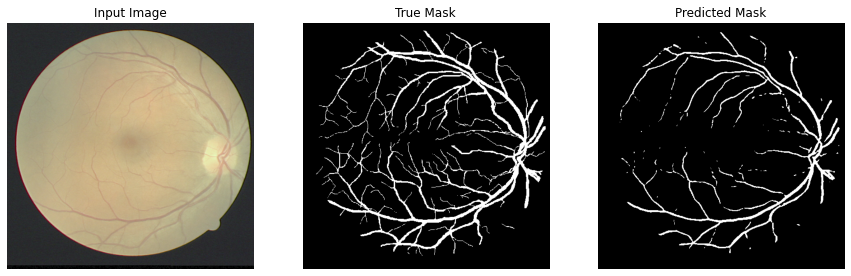


Sample Prediction after epoch 51

Epoch 52/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1334 - accuracy: 0.9677 - val_loss: 0.1540 - val_accuracy: 0.9552

Epoch 00052: val_loss did not improve from 0.15178
Epoch 53/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1317 - accuracy: 0.9680 - val_loss: 0.1530 - val_accuracy: 0.9543

Epoch 00053: val_loss did not improve from 0.15178
Epoch 54/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1299 - accuracy: 0.9681 - val_loss: 0.1506 - val_accuracy: 0.9560

Epoch 00054: val_loss improved from 0.15178 to 0.15058, saving model to /kaggle/Models/model2.h5
Epoch 55/250
9/9 [==============================] - 7s 752ms/step - loss: 0.1279 - accuracy: 0.9685 - val_loss: 0.1516 - val_accuracy: 0.9541

Epoch 00055: val_loss did not improve from 0.15058
Epoch 56/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1262 - accuracy: 0.9688 - val_loss: 0.1486 - val_accuracy: 0.9548



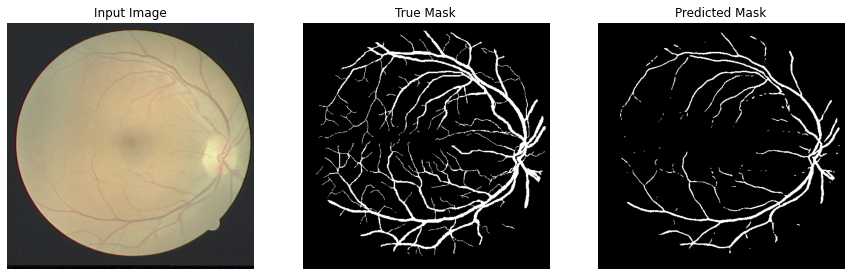


Sample Prediction after epoch 56

Epoch 57/250
9/9 [==============================] - 7s 751ms/step - loss: 0.1245 - accuracy: 0.9690 - val_loss: 0.1438 - val_accuracy: 0.9567

Epoch 00057: val_loss improved from 0.14857 to 0.14378, saving model to /kaggle/Models/model2.h5
Epoch 58/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1231 - accuracy: 0.9691 - val_loss: 0.1411 - val_accuracy: 0.9582

Epoch 00058: val_loss improved from 0.14378 to 0.14105, saving model to /kaggle/Models/model2.h5
Epoch 59/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1216 - accuracy: 0.9694 - val_loss: 0.1441 - val_accuracy: 0.9564

Epoch 00059: val_loss did not improve from 0.14105
Epoch 60/250
9/9 [==============================] - 7s 747ms/step - loss: 0.1208 - accuracy: 0.9692 - val_loss: 0.1427 - val_accuracy: 0.9565

Epoch 00060: val_loss did not improve from 0.14105
Epoch 61/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1195 - accuracy: 0.96

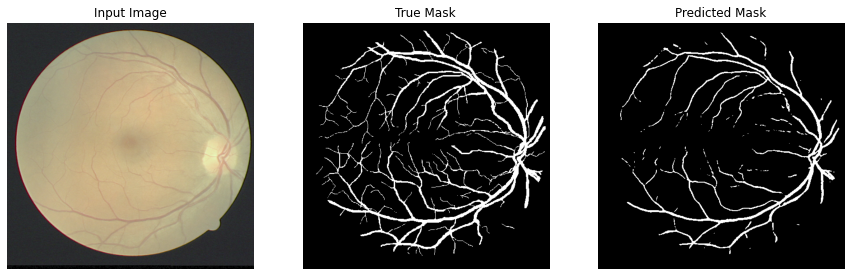


Sample Prediction after epoch 61

Epoch 62/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1174 - accuracy: 0.9698 - val_loss: 0.1387 - val_accuracy: 0.9576

Epoch 00062: val_loss did not improve from 0.13808
Epoch 63/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1156 - accuracy: 0.9702 - val_loss: 0.1355 - val_accuracy: 0.9585

Epoch 00063: val_loss improved from 0.13808 to 0.13553, saving model to /kaggle/Models/model2.h5
Epoch 64/250
9/9 [==============================] - 7s 751ms/step - loss: 0.1141 - accuracy: 0.9705 - val_loss: 0.1330 - val_accuracy: 0.9599

Epoch 00064: val_loss improved from 0.13553 to 0.13299, saving model to /kaggle/Models/model2.h5
Epoch 65/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1130 - accuracy: 0.9706 - val_loss: 0.1354 - val_accuracy: 0.9585

Epoch 00065: val_loss did not improve from 0.13299
Epoch 66/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1114 - accuracy: 0.97

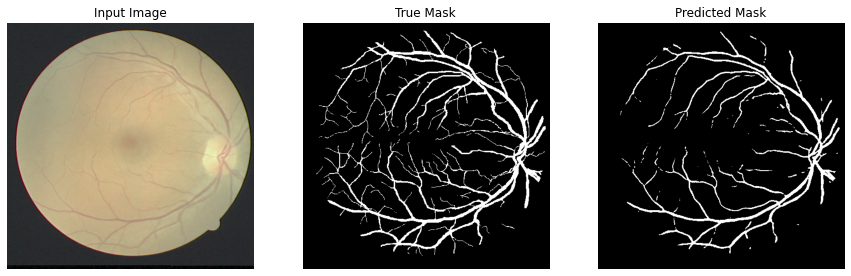


Sample Prediction after epoch 66

Epoch 67/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1103 - accuracy: 0.9710 - val_loss: 0.1294 - val_accuracy: 0.9612

Epoch 00067: val_loss improved from 0.13034 to 0.12935, saving model to /kaggle/Models/model2.h5
Epoch 68/250
9/9 [==============================] - 7s 751ms/step - loss: 0.1092 - accuracy: 0.9711 - val_loss: 0.1288 - val_accuracy: 0.9603

Epoch 00068: val_loss improved from 0.12935 to 0.12883, saving model to /kaggle/Models/model2.h5
Epoch 69/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1081 - accuracy: 0.9713 - val_loss: 0.1299 - val_accuracy: 0.9596

Epoch 00069: val_loss did not improve from 0.12883
Epoch 70/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1072 - accuracy: 0.9713 - val_loss: 0.1303 - val_accuracy: 0.9600

Epoch 00070: val_loss did not improve from 0.12883
Epoch 71/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1064 - accuracy: 0.97

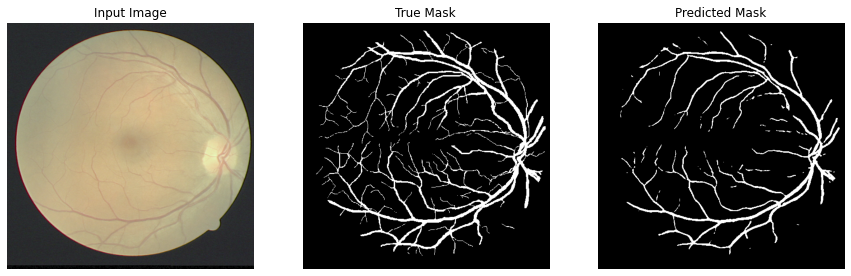


Sample Prediction after epoch 71

Epoch 72/250
9/9 [==============================] - 7s 750ms/step - loss: 0.1056 - accuracy: 0.9713 - val_loss: 0.1235 - val_accuracy: 0.9620

Epoch 00072: val_loss improved from 0.12601 to 0.12346, saving model to /kaggle/Models/model2.h5
Epoch 73/250
9/9 [==============================] - 7s 748ms/step - loss: 0.1044 - accuracy: 0.9715 - val_loss: 0.1238 - val_accuracy: 0.9617

Epoch 00073: val_loss did not improve from 0.12346
Epoch 74/250
9/9 [==============================] - 7s 750ms/step - loss: 0.1032 - accuracy: 0.9718 - val_loss: 0.1241 - val_accuracy: 0.9615

Epoch 00074: val_loss did not improve from 0.12346
Epoch 75/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1019 - accuracy: 0.9721 - val_loss: 0.1209 - val_accuracy: 0.9625

Epoch 00075: val_loss improved from 0.12346 to 0.12092, saving model to /kaggle/Models/model2.h5
Epoch 76/250
9/9 [==============================] - 7s 749ms/step - loss: 0.1010 - accuracy: 0.97

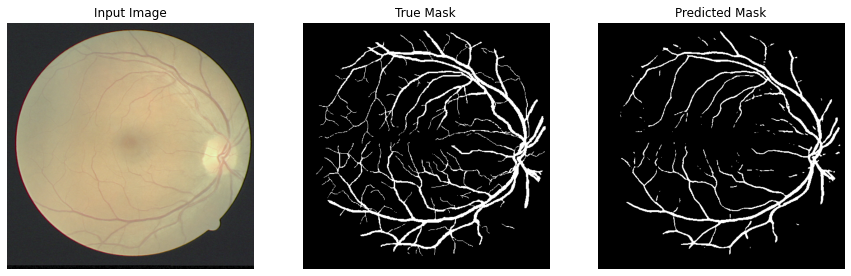


Sample Prediction after epoch 76

Epoch 77/250
9/9 [==============================] - 7s 751ms/step - loss: 0.1002 - accuracy: 0.9722 - val_loss: 0.1248 - val_accuracy: 0.9611

Epoch 00077: val_loss did not improve from 0.12092
Epoch 78/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0992 - accuracy: 0.9724 - val_loss: 0.1210 - val_accuracy: 0.9629

Epoch 00078: val_loss did not improve from 0.12092
Epoch 79/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0982 - accuracy: 0.9726 - val_loss: 0.1205 - val_accuracy: 0.9628

Epoch 00079: val_loss improved from 0.12092 to 0.12051, saving model to /kaggle/Models/model2.h5
Epoch 80/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0974 - accuracy: 0.9726 - val_loss: 0.1200 - val_accuracy: 0.9625

Epoch 00080: val_loss improved from 0.12051 to 0.12000, saving model to /kaggle/Models/model2.h5
Epoch 81/250
9/9 [==============================] - 7s 764ms/step - loss: 0.0970 - accuracy: 0.97

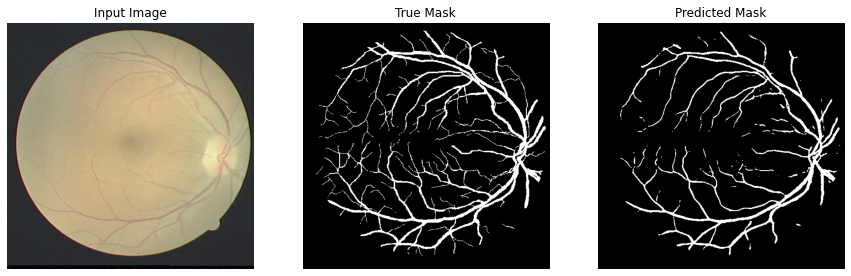


Sample Prediction after epoch 81

Epoch 82/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0963 - accuracy: 0.9725 - val_loss: 0.1207 - val_accuracy: 0.9622

Epoch 00082: val_loss did not improve from 0.11930
Epoch 83/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0956 - accuracy: 0.9726 - val_loss: 0.1220 - val_accuracy: 0.9612

Epoch 00083: val_loss did not improve from 0.11930
Epoch 84/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0945 - accuracy: 0.9729 - val_loss: 0.1188 - val_accuracy: 0.9621

Epoch 00084: val_loss improved from 0.11930 to 0.11882, saving model to /kaggle/Models/model2.h5
Epoch 85/250
9/9 [==============================] - 7s 753ms/step - loss: 0.0936 - accuracy: 0.9731 - val_loss: 0.1199 - val_accuracy: 0.9624

Epoch 00085: val_loss did not improve from 0.11882
Epoch 86/250
9/9 [==============================] - 7s 754ms/step - loss: 0.0934 - accuracy: 0.9729 - val_loss: 0.1172 - val_accuracy: 0.9629



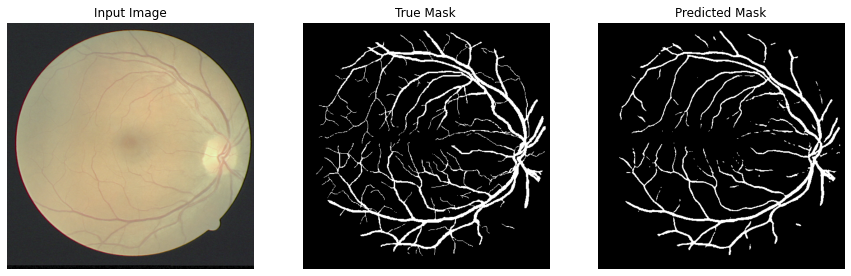


Sample Prediction after epoch 86

Epoch 87/250
9/9 [==============================] - 7s 754ms/step - loss: 0.0928 - accuracy: 0.9729 - val_loss: 0.1155 - val_accuracy: 0.9633

Epoch 00087: val_loss improved from 0.11720 to 0.11547, saving model to /kaggle/Models/model2.h5
Epoch 88/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0914 - accuracy: 0.9734 - val_loss: 0.1160 - val_accuracy: 0.9633

Epoch 00088: val_loss did not improve from 0.11547
Epoch 89/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0900 - accuracy: 0.9738 - val_loss: 0.1160 - val_accuracy: 0.9631

Epoch 00089: val_loss did not improve from 0.11547
Epoch 90/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0892 - accuracy: 0.9739 - val_loss: 0.1165 - val_accuracy: 0.9631

Epoch 00090: val_loss did not improve from 0.11547
Epoch 91/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0887 - accuracy: 0.9740 - val_loss: 0.1152 - val_accuracy: 0.9629



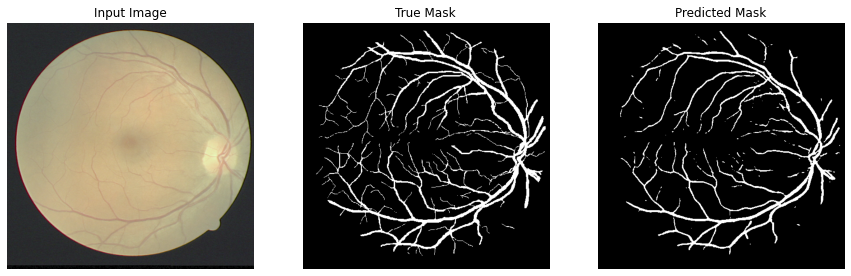


Sample Prediction after epoch 91

Epoch 92/250
9/9 [==============================] - 7s 747ms/step - loss: 0.0878 - accuracy: 0.9742 - val_loss: 0.1147 - val_accuracy: 0.9629

Epoch 00092: val_loss improved from 0.11520 to 0.11469, saving model to /kaggle/Models/model2.h5
Epoch 93/250
9/9 [==============================] - 7s 752ms/step - loss: 0.0870 - accuracy: 0.9744 - val_loss: 0.1141 - val_accuracy: 0.9630

Epoch 00093: val_loss improved from 0.11469 to 0.11414, saving model to /kaggle/Models/model2.h5
Epoch 94/250
9/9 [==============================] - 7s 754ms/step - loss: 0.0863 - accuracy: 0.9745 - val_loss: 0.1135 - val_accuracy: 0.9632

Epoch 00094: val_loss improved from 0.11414 to 0.11349, saving model to /kaggle/Models/model2.h5
Epoch 95/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0857 - accuracy: 0.9745 - val_loss: 0.1143 - val_accuracy: 0.9629

Epoch 00095: val_loss did not improve from 0.11349
Epoch 96/250
9/9 [==============================] -

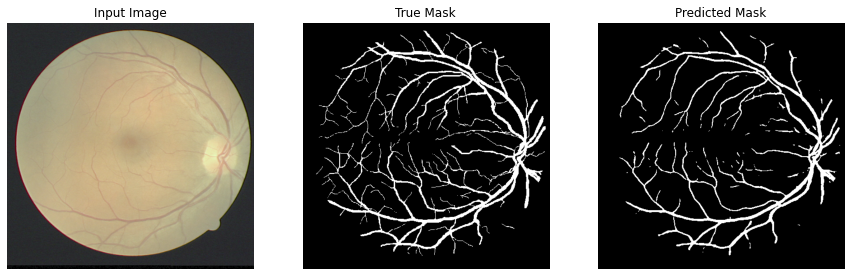


Sample Prediction after epoch 96

Epoch 97/250
9/9 [==============================] - 7s 753ms/step - loss: 0.0851 - accuracy: 0.9744 - val_loss: 0.1147 - val_accuracy: 0.9624

Epoch 00097: val_loss did not improve from 0.11349
Epoch 98/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0844 - accuracy: 0.9745 - val_loss: 0.1152 - val_accuracy: 0.9622

Epoch 00098: val_loss did not improve from 0.11349
Epoch 99/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0841 - accuracy: 0.9744 - val_loss: 0.1144 - val_accuracy: 0.9626

Epoch 00099: val_loss did not improve from 0.11349
Epoch 100/250
9/9 [==============================] - 7s 747ms/step - loss: 0.0834 - accuracy: 0.9746 - val_loss: 0.1134 - val_accuracy: 0.9629

Epoch 00100: val_loss improved from 0.11349 to 0.11345, saving model to /kaggle/Models/model2.h5
Epoch 101/250
9/9 [==============================] - 7s 752ms/step - loss: 0.0831 - accuracy: 0.9746 - val_loss: 0.1134 - val_accuracy: 0.9627

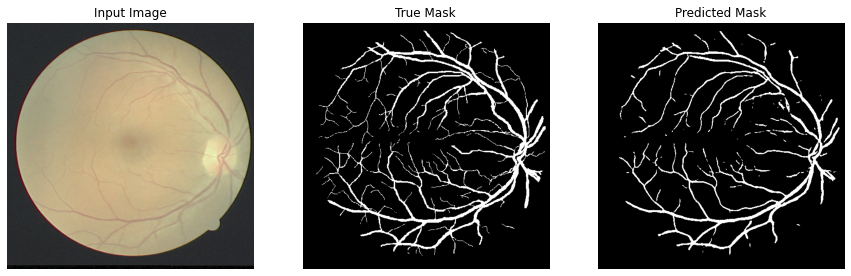


Sample Prediction after epoch 101

Epoch 102/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0825 - accuracy: 0.9747 - val_loss: 0.1119 - val_accuracy: 0.9630

Epoch 00102: val_loss improved from 0.11341 to 0.11194, saving model to /kaggle/Models/model2.h5
Epoch 103/250
9/9 [==============================] - 7s 752ms/step - loss: 0.0813 - accuracy: 0.9751 - val_loss: 0.1127 - val_accuracy: 0.9626

Epoch 00103: val_loss did not improve from 0.11194
Epoch 104/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0805 - accuracy: 0.9753 - val_loss: 0.1118 - val_accuracy: 0.9630

Epoch 00104: val_loss improved from 0.11194 to 0.11179, saving model to /kaggle/Models/model2.h5
Epoch 105/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0794 - accuracy: 0.9757 - val_loss: 0.1112 - val_accuracy: 0.9632

Epoch 00105: val_loss improved from 0.11179 to 0.11118, saving model to /kaggle/Models/model2.h5
Epoch 106/250
9/9 [===========================

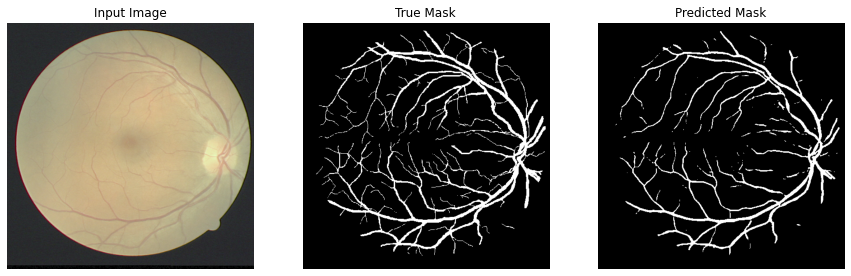


Sample Prediction after epoch 106

Epoch 107/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0780 - accuracy: 0.9760 - val_loss: 0.1114 - val_accuracy: 0.9631

Epoch 00107: val_loss did not improve from 0.11118
Epoch 108/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0775 - accuracy: 0.9761 - val_loss: 0.1105 - val_accuracy: 0.9633

Epoch 00108: val_loss improved from 0.11118 to 0.11047, saving model to /kaggle/Models/model2.h5
Epoch 109/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0768 - accuracy: 0.9763 - val_loss: 0.1111 - val_accuracy: 0.9630

Epoch 00109: val_loss did not improve from 0.11047
Epoch 110/250
9/9 [==============================] - 7s 759ms/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.1122 - val_accuracy: 0.9628

Epoch 00110: val_loss did not improve from 0.11047
Epoch 111/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.1103 - val_accuracy: 0.

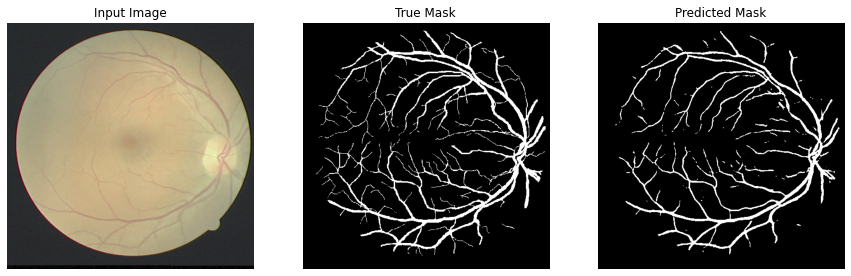


Sample Prediction after epoch 111

Epoch 112/250
9/9 [==============================] - 7s 747ms/step - loss: 0.0758 - accuracy: 0.9764 - val_loss: 0.1109 - val_accuracy: 0.9627

Epoch 00112: val_loss did not improve from 0.11031
Epoch 113/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0748 - accuracy: 0.9767 - val_loss: 0.1115 - val_accuracy: 0.9625

Epoch 00113: val_loss did not improve from 0.11031
Epoch 114/250
9/9 [==============================] - 7s 751ms/step - loss: 0.0742 - accuracy: 0.9768 - val_loss: 0.1095 - val_accuracy: 0.9633

Epoch 00114: val_loss improved from 0.11031 to 0.10946, saving model to /kaggle/Models/model2.h5
Epoch 115/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0731 - accuracy: 0.9772 - val_loss: 0.1108 - val_accuracy: 0.9628

Epoch 00115: val_loss did not improve from 0.10946
Epoch 116/250
9/9 [==============================] - 7s 746ms/step - loss: 0.0726 - accuracy: 0.9773 - val_loss: 0.1128 - val_accuracy: 0.

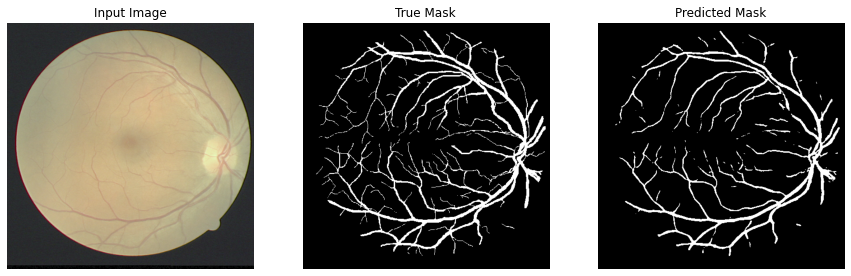


Sample Prediction after epoch 116

Epoch 117/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0714 - accuracy: 0.9778 - val_loss: 0.1098 - val_accuracy: 0.9631

Epoch 00117: val_loss did not improve from 0.10946
Epoch 118/250
9/9 [==============================] - 7s 747ms/step - loss: 0.0706 - accuracy: 0.9781 - val_loss: 0.1099 - val_accuracy: 0.9633

Epoch 00118: val_loss did not improve from 0.10946
Epoch 119/250
9/9 [==============================] - 7s 748ms/step - loss: 0.0703 - accuracy: 0.9780 - val_loss: 0.1103 - val_accuracy: 0.9633

Epoch 00119: val_loss did not improve from 0.10946
Epoch 120/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0702 - accuracy: 0.9779 - val_loss: 0.1099 - val_accuracy: 0.9631

Epoch 00120: val_loss did not improve from 0.10946
Epoch 121/250
9/9 [==============================] - 7s 749ms/step - loss: 0.0704 - accuracy: 0.9776 - val_loss: 0.1124 - val_accuracy: 0.9624

Epoch 00121: val_loss did not improve fr

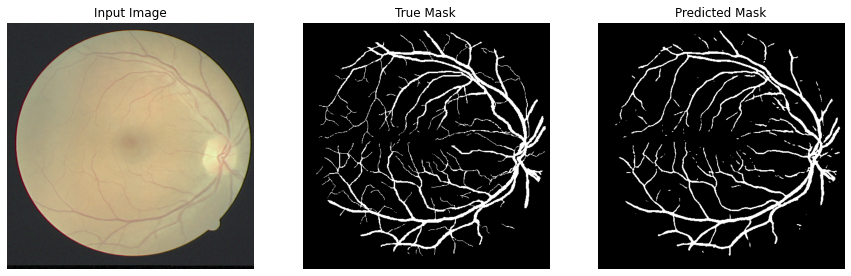


Sample Prediction after epoch 121

Epoch 122/250
9/9 [==============================] - 7s 747ms/step - loss: 0.0701 - accuracy: 0.9777 - val_loss: 0.1113 - val_accuracy: 0.9630

Epoch 00122: val_loss did not improve from 0.10946
Epoch 123/250
9/9 [==============================] - 7s 747ms/step - loss: 0.0697 - accuracy: 0.9778 - val_loss: 0.1098 - val_accuracy: 0.9631

Epoch 00123: val_loss did not improve from 0.10946
Epoch 124/250
9/9 [==============================] - 7s 750ms/step - loss: 0.0691 - accuracy: 0.9779 - val_loss: 0.1109 - val_accuracy: 0.9627

Epoch 00124: val_loss did not improve from 0.10946
Epoch 00124: early stopping


In [65]:
# define optomizer
optim = keras.optimizers.Adam(0.0001)
bce   = keras.losses.BinaryCrossentropy()
metrics = ["accuracy"]

# compile keras model with defined optimozer, loss and metrics
model2.compile(optim, bce, metrics)

history = model2.fit(
    train_dataset,
    epochs=250,
    validation_data=validation_dataset,
    callbacks=[checkpoint_callback, early_stopping_callback, display_callback]
)

In [66]:
test_data = '/kaggle/input/dataset/new_data/new_data/test/image'
test_images = sorted(
    [
        os.path.join(test_data, fname)
        for fname in os.listdir(test_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

test_images

['/kaggle/input/dataset/new_data/new_data/test/image/01_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/02_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/03_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/04_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/05_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/06_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/07_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/08_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/09_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/10_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/11_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/12_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/13_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/14_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/15_test.t

In [67]:
test_mask = '/kaggle/input/dataset/new_data/new_data/test/mask'
test_masks = sorted(
    [
        os.path.join(test_mask, fname)
        for fname in os.listdir(test_mask)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
test_masks

['/kaggle/input/dataset/new_data/new_data/test/mask/01_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/02_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/03_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/04_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/05_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/06_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/07_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/08_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/09_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/10_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/11_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/12_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/13_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/14_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/15_test.gif',
 '/kaggle/

In [68]:
print("Number of samples:", len(test_images), len(test_masks))
for test_path, mask_path in zip(test_images[:10], test_masks[:10]):
    print(test_path[-31:], "|", mask_path[-34:])

Number of samples: 20 20
new_data/test/image/01_test.tif | ata/new_data/test/mask/01_test.gif
new_data/test/image/02_test.tif | ata/new_data/test/mask/02_test.gif
new_data/test/image/03_test.tif | ata/new_data/test/mask/03_test.gif
new_data/test/image/04_test.tif | ata/new_data/test/mask/04_test.gif
new_data/test/image/05_test.tif | ata/new_data/test/mask/05_test.gif
new_data/test/image/06_test.tif | ata/new_data/test/mask/06_test.gif
new_data/test/image/07_test.tif | ata/new_data/test/mask/07_test.gif
new_data/test/image/08_test.tif | ata/new_data/test/mask/08_test.gif
new_data/test/image/09_test.tif | ata/new_data/test/mask/09_test.gif
new_data/test/image/10_test.tif | ata/new_data/test/mask/10_test.gif


In [69]:
IMAGE_SIZE = 512
BATCH_SIZE = 12

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset

test_dataset = data_generator(test_images, test_masks)
test_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [70]:
valid_dataset = test_dataset

In [71]:
test_masks = np.concatenate([y for x, y in valid_dataset], axis=0)
masks = test_masks.ravel()

In [72]:
test_imgs = np.concatenate([x for x, y in valid_dataset], axis=0)
predictions = model2.predict(test_imgs)
predictions.shape

(20, 512, 512, 1)

In [73]:
y_pred = predictions.ravel()
y_pred = (y_pred > 0.5).astype('int32')
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(masks, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98   4784655
           1       0.84      0.71      0.77    458225

    accuracy                           0.96   5242880
   macro avg       0.91      0.85      0.88   5242880
weighted avg       0.96      0.96      0.96   5242880



In [75]:
def jaccard(target, prediction):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
print('The Jaccard Score is: ', jaccard(y_pred, masks))


The Jaccard Score is:  0.6271659531157533


In [76]:
def my_dice(target, prediction):
 intersection = np.logical_and(target, prediction)
 union = np.logical_or(target, prediction)
 dice = (2*np.sum(intersection))/(np.sum(union)+np.sum(intersection))
 return dice
print('The Dice Score is: ', my_dice(y_pred, masks))

The Dice Score is:  0.7708690707482349


In [77]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(masks, y_pred)
print('The MCC Score is:', mcc)


The MCC Score is: 0.7542467767231144


In [78]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming 'masks' and 'y_pred' are the true labels and predicted probabilities for the positive class.
fpr, tpr, thresholds = roc_curve(masks, y_pred)
auc = roc_auc_score(masks, y_pred)

print('The AUC Score is:', auc)


The AUC Score is: 0.8486877740117017


(-0.5, 511.5, 511.5, -0.5)

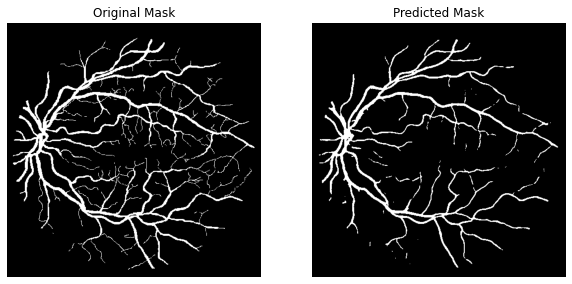

In [79]:
image = test_imgs[4]
mask = test_masks[4]
image = np.expand_dims(image, axis=0)
pred_mask = model2.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

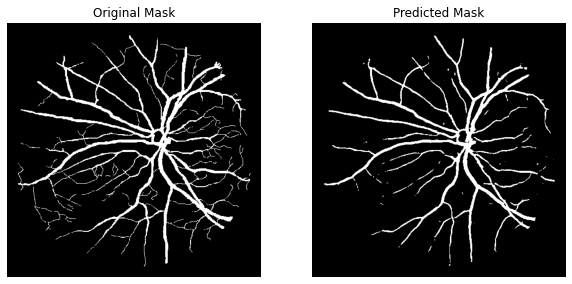

In [80]:
image = test_imgs[3]
mask = test_masks[3]
image = np.expand_dims(image, axis=0)
pred_mask = model2.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

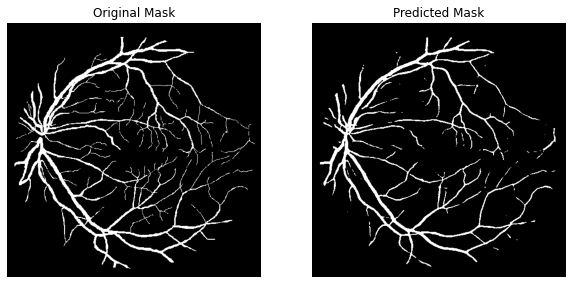

In [81]:
image = test_imgs[11]
mask = test_masks[11]
image = np.expand_dims(image, axis=0)
pred_mask = model2.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

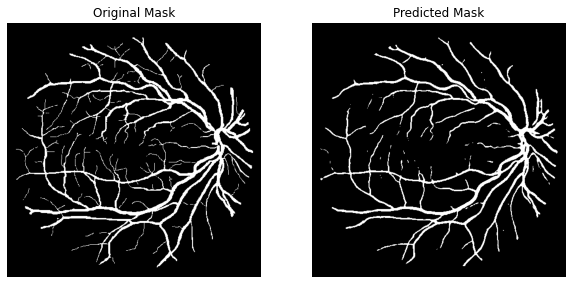

In [82]:
image = test_imgs[1]
mask = test_masks[1]
image = np.expand_dims(image, axis=0)
pred_mask = model2.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')